<a href="https://colab.research.google.com/github/shanksghub/Musk/blob/master/Keras_Binary_Classification_Corrections_(1)_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
# load dataset
url = 'https://raw.githubusercontent.com/shanksghub/Musk.csv/master/musk_csv.csv'
df = pd.read_csv(url)

In [0]:
dataset = df.values
# split into input (X) and output (Y) variables
X = df.drop(['class','ID','molecule_name','conformation_name'], axis = 1)
y = df[['class']].to_numpy().ravel()

In [0]:
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Model
model = Sequential()
model.add(Dense(256, input_shape=X.shape[1:], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               42752     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 108,801
Trainable params: 108,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

#     def on_batch_end(self, batch, logs={}):
#         self.losses.append(logs.get('loss'))

In [0]:
# loss history recorder
history = LossHistory()

In [12]:
train_history = model.fit(X_train, y_train, epochs=10, verbose=1, 
                                    validation_data=(X_test, y_test), 
                                    callbacks=[history])




Train on 5278 samples, validate on 1320 samples
Epoch 1/10





5278/5278 [==============================] - 1s 191us/step - loss: 0.1839 - acc: 0.9269 - val_loss: 0.1190 - val_acc: 0.9462
Epoch 2/10
5278/5278 [==============================] - 0s 88us/step - loss: 0.0793 - acc: 0.9723 - val_loss: 0.0595 - val_acc: 0.9780
Epoch 3/10
5278/5278 [==============================] - 0s 92us/step - loss: 0.0510 - acc: 0.9786 - val_loss: 0.0556 - val_acc: 0.9833
Epoch 4/10
5278/5278 [==============================] - 0s 81us/step - loss: 0.0368 - acc: 0.9867 - val_loss: 0.0404 - val_acc: 0.9826
Epoch 5/10
5278/5278 [==============================] - 0s 85us/step - loss: 0.0261 - acc: 0.9907 - val_loss: 0.0219 - val_acc: 0.9932
Epoch 6/10
5278/5278 [==============================] - 0s 84us/step - loss: 0.0172 - acc: 0.9943 - val_loss: 0.0206 - val_acc: 0.9879
Epoch 7/10
5278/5278 [==============================] - 0s 86us/step - loss: 0.0095 - acc: 0.9966 - val_loss: 0.0187 - val_acc: 0.995

In [13]:
train_history.history

{'acc': [0.9268662370755484,
  0.9723380068207654,
  0.9785903751420992,
  0.9867374003724014,
  0.9907161803713528,
  0.9943160287987874,
  0.9965896172792724,
  0.9895793859730078,
  0.9941265629339778,
  0.9986737400530504],
 'loss': [0.18387541500128052,
  0.07932508373389521,
  0.05099728945981501,
  0.0368306129043636,
  0.026133140484128726,
  0.017227481837854122,
  0.00945381497254125,
  0.028347363032389314,
  0.014281459103776732,
  0.006478885941673534],
 'val_acc': [0.9462121212121212,
  0.978030303030303,
  0.9833333333333333,
  0.9825757575757575,
  0.9931818181818182,
  0.9878787878787879,
  0.9954545454545455,
  0.978030303030303,
  0.9954545454545455,
  0.9946969696969697],
 'val_loss': [0.11897695125503974,
  0.05948396335271272,
  0.05564389113675464,
  0.04043398542809441,
  0.021938386924959946,
  0.020631938222372397,
  0.01867356303881741,
  0.046984083858798396,
  0.012532593328929083,
  0.008574101312048945]}

In [0]:
df = pd.DataFrame(columns=('loss', 'loss_test'))  

loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

df['loss'] = loss
df['loss_test'] = val_loss

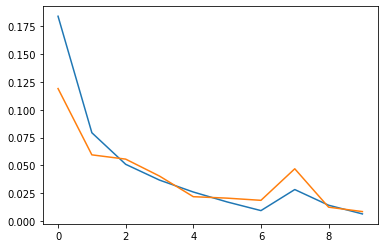

In [15]:
plt.plot(range(len(df['loss'])),df['loss'],label='loss')
plt.plot(range(len(df['loss'])),df['loss_test'],label='Val loss')

In [0]:
from keras.models import load_model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')


In [0]:

import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
import keras
import numpy as np

In [22]:
print('\n-- Training data --')
predictions = model.predict(X_train)
accuracy = sklearn.metrics.accuracy_score(y_train, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_train, np.argmax(predictions, axis=1)))
print('')


-- Training data --
Accuracy: 84.69
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      4470
           1       0.00      0.00      0.00       808

    accuracy                           0.85      5278
   macro avg       0.42      0.50      0.46      5278
weighted avg       0.72      0.85      0.78      5278

Confusion Matrix:
[[4470    0]
 [ 808    0]]



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
